In [1]:
import pandas as pd
tweets = pd.read_csv("input/data_elonmusk.csv", encoding='latin1')
tweets.head(10)

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
5,Row5,RT @SpaceX: Supporting the creation of a perma...,2017-09-29 08:57:29,SpaceX,elonmusk
6,Row6,BFR will take you anywhere on Earth in less th...,2017-09-29 08:53:00,NaN,elonmusk
7,Row7,Mars City\nOpposite of Earth. Dawn and dusk sk...,2017-09-29 06:03:32,NaN,elonmusk
8,Row8,Moon Base Alpha https://t.co/voY8qEW9kl,2017-09-29 05:44:55,NaN,elonmusk
9,Row9,Will be announcing something really special at...,2017-09-29 02:36:17,NaN,elonmusk


In [2]:
tweets = tweets.assign(Time=pd.to_datetime(tweets.Time)).drop('row ID', axis='columns')
tweets.head(10)

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
5,RT @SpaceX: Supporting the creation of a perma...,2017-09-29 08:57:29,SpaceX,elonmusk
6,BFR will take you anywhere on Earth in less th...,2017-09-29 08:53:00,NaN,elonmusk
7,Mars City\nOpposite of Earth. Dawn and dusk sk...,2017-09-29 06:03:32,NaN,elonmusk
8,Moon Base Alpha https://t.co/voY8qEW9kl,2017-09-29 05:44:55,NaN,elonmusk
9,Will be announcing something really special at...,2017-09-29 02:36:17,NaN,elonmusk


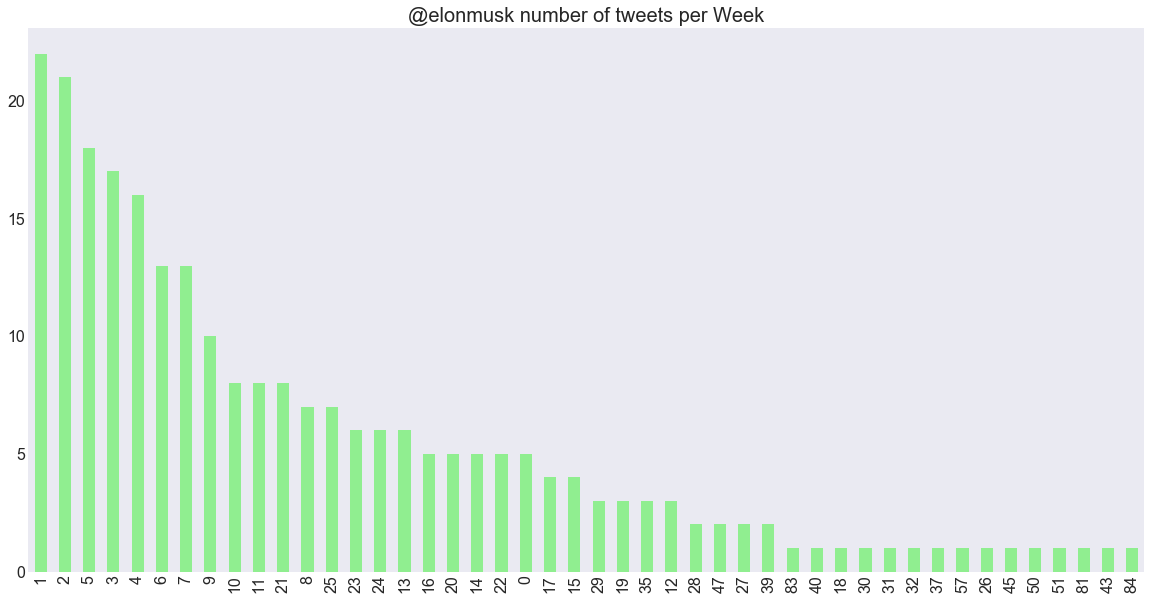

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
#Timegrouper - used to groupby by time frequency  
(tweets
     .set_index('Time')
     .groupby(pd.TimeGrouper('7D'))
     .Tweet
     .count()
     .value_counts()
     .sort_values(ascending=False)
).plot.bar(figsize=(20,10), fontsize=16, color='lightgreen')
plt.gca().set_title('@elonmusk number of tweets per Week', fontsize=20)
plt.show()

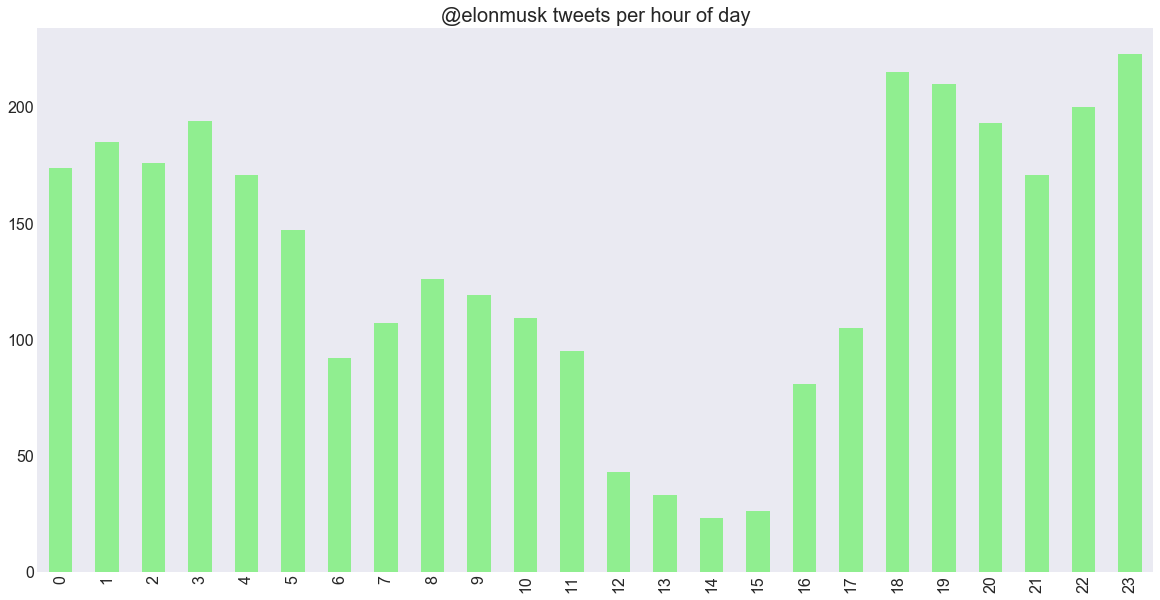

In [4]:
(tweets.Time
     .dt
     .hour
     .value_counts()
     .sort_index()
).plot.bar(figsize=(20,10), fontsize=16, color='lightgreen')
plt.gca().set_title('@elonmusk tweets per hour of day', fontsize=20)
plt.show()

In [5]:
#Musk's tweets do not quite go silent in the dead of night. 
#While his 4 AM tweet volume is nowhere near where it is at midday, it never stops!

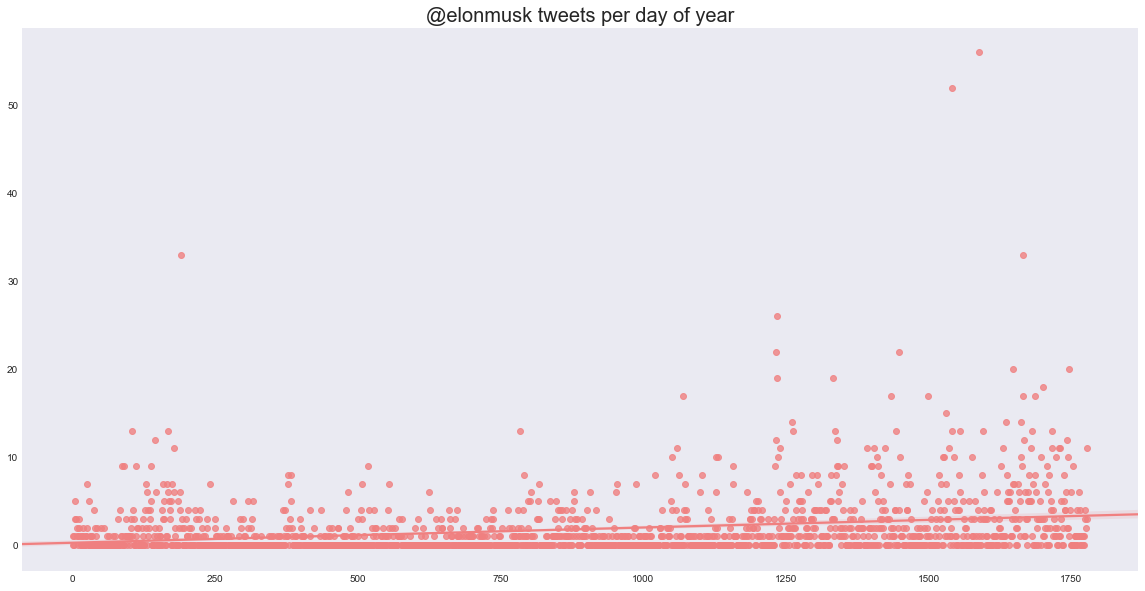

In [6]:
d = (tweets
     .set_index('Time')
     .groupby(pd.TimeGrouper('1D'))
     .Tweet
     .count()
     .sort_index()
     .reset_index()
    )
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
sns.regplot(d.index.values, d.Tweet.values, ax=ax, color='lightcoral')
ax.set_title('@elonmusk tweets per day of year', fontsize=20)
plt.show()

In [7]:
#Tweet volume is going up over time.
tweets['Retweet from'].notnull().value_counts() 

False    2693
True      525
Name: Retweet from, dtype: int64

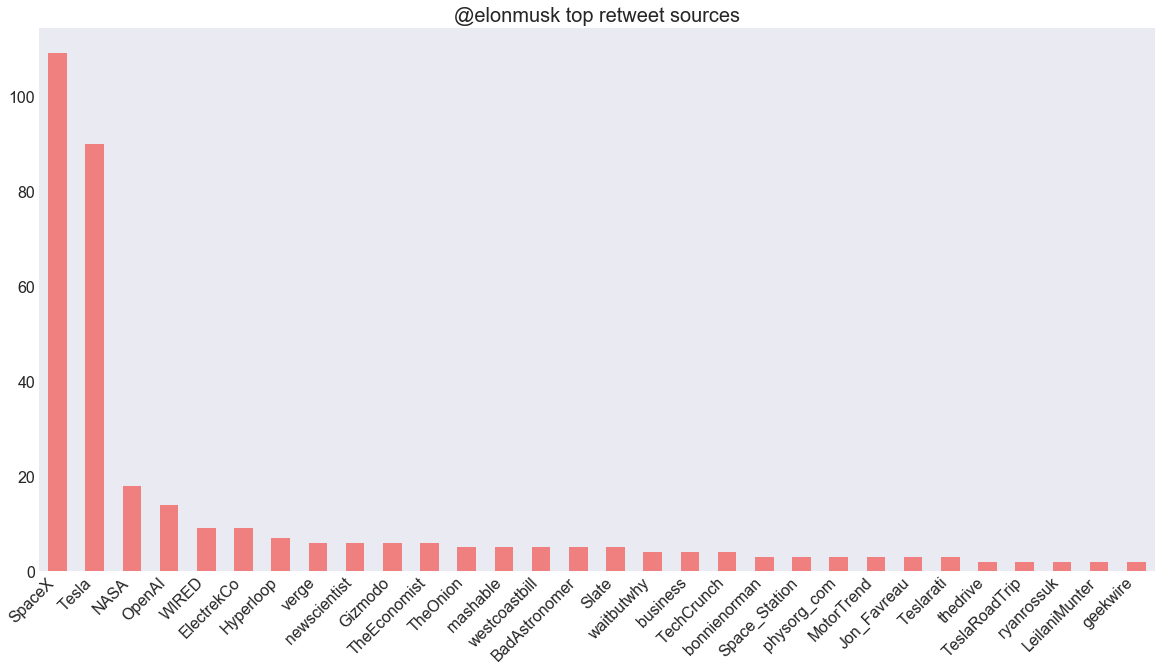

In [8]:
#retweets only 1/6 times
tweets['Retweet from'].value_counts().head(30).plot.bar(
    figsize=(20, 10), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@elonmusk top retweet sources', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
plt.show()

In [9]:
tweets.Tweet.str.contains('https://').value_counts() / len(tweets)

False    0.748602
True     0.251398
Name: Tweet, dtype: float64

In [10]:
# 1/4 tweets include urls
tweets.Tweet.str.contains('@').value_counts() / len(tweets)

True     0.643567
False    0.356433
Name: Tweet, dtype: float64

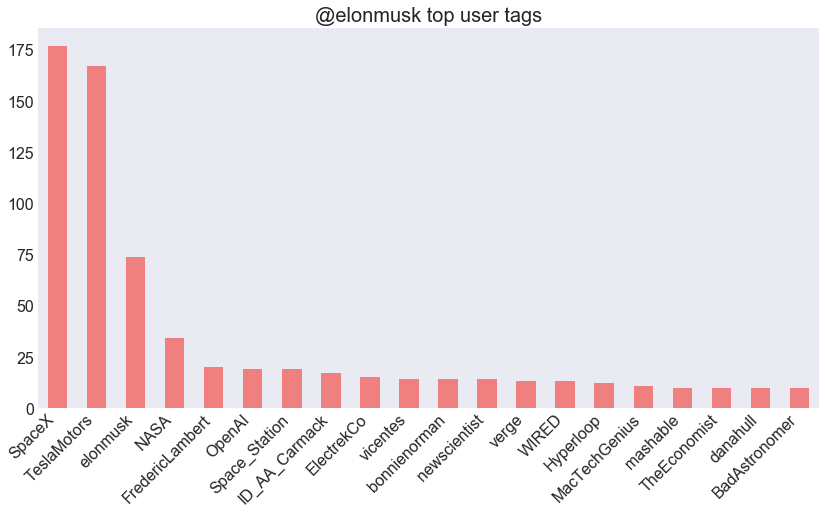

In [11]:
#third tag or are replies to other users.
import itertools

c = list(
itertools.chain(
    *tweets.Tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
plt.show()

In [16]:
from nltk import word_tokenize
# nltk.download()
tokens = tweets.head(10).Tweet.map(word_tokenize)

def what_does_elon_think_about(x):
    x_l = x.lower()
    x_t = x.title()
    return tweets.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [21]:
what_does_elon_think_about('Life').Tweet.values.tolist()

[]